<a href="https://colab.research.google.com/github/aditiaropalli/Study_Notes/blob/main/Multithreading_synchronisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synchronisation

- mechanism which ensures that two or more concurrent threads do not execute simultaneously execute the **critical section** segment of the code

- Critical section  -> shared resource
- Concurrent access to a shared resource is called as **race condition**

- 2 or more threads can access shared data and change it at the same time which leads to unpredictability and vary determining on the timing of context switching of the process

### Concept:

In [10]:
import threading

# this is supposed to be giving  a race condition but for some reason it is absolutely NOT

# global variable
x = 0

def increment():
  global x
  x += 1

def thread_task():
  for _ in range(1000000):
    increment()

def main_task():
  global x
  x = 0

  t1 = threading.Thread(target = thread_task)
  t2 = threading.Thread(target = thread_task)

  # start
  t1.start()
  t2.start()

  t1.join()
  t2.join()

if __name__ == "__main__":
  for i in range(10):
    main_task()
    print(f"Iteration {i}: {x}")


Iteration 0: 2000000
Iteration 1: 2000000
Iteration 2: 2000000
Iteration 3: 2000000
Iteration 4: 2000000
Iteration 5: 2000000
Iteration 6: 2000000
Iteration 7: 2000000
Iteration 8: 2000000
Iteration 9: 2000000


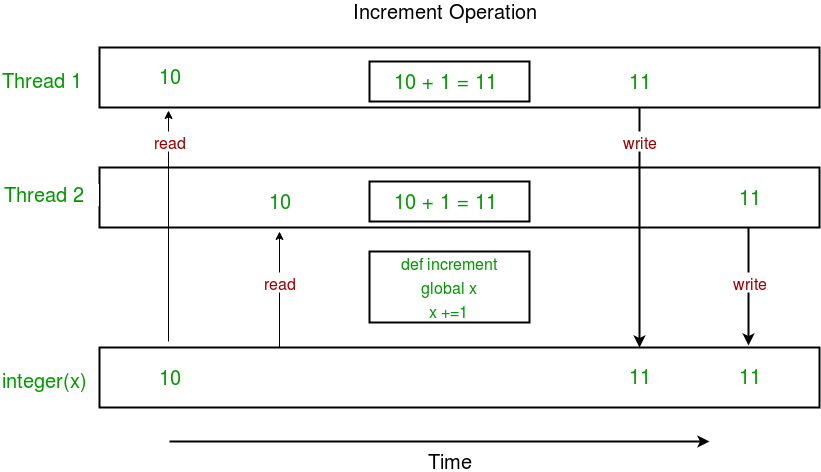

### To avoid race condition

- 'Threading' module provides a Lock class to deal with race conditions. This is implemented using a semaphore lock

### Lock
can be:
- blocking
- non-blocking

  - acquire([blocking]) : can be invoked with the blocking argument set to true or false
  - release() : to release a lock, if lock is already realeased it will return a ThreadError

  

In [11]:
# import threading

x = 0 # global

def incr():
  global x
  x  += 1

def thread_task(lock):
  for _ in range(10000):
    # critical section of the target func
    lock.acquire() #lock applied
    incr() #no thread can access the critical section
    lock.release()

def main_task():
  global x
  x = 0

  lock = threading.Lock()

  t1 = threading.Thread(target=thread_task, args=(lock,))
  t2 = threading.Thread(target=thread_task, args=(lock,))

  t1.start()
  t2.start()

  t1.join()
  t2.join()


if __name__ == "__main__":
  for i in range(10):
    main_task()
    print(x)

20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
